<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/reverse-image-search-engine/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
features = extract_features('/content/drive/MyDrive/My-Colab-Notebook/sample-images/dog.jpg', model)
print(len(features))

100352


In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

In [ ]:
root_dir = '/content/drive/MyDrive/My-Colab-Notebook/datasets/caltech101'
filenames = sorted(get_file_list(root_dir))
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
with open('/content/drive/MyDrive/My-Colab-Notebook/features-caltech101-resnet.pkl', 'wb') as fid:
     pickle.dump(feature_list, fid)

with open('/content/drive/MyDrive/My-Colab-Notebook/filenames-caltech101.pkl', 'wb') as fid:
     pickle.dump(filenames, fid)

In [4]:
with open('/content/drive/MyDrive/My-Colab-Notebook/filenames-caltech101.pkl', 'rb') as fid:
    filenames = pickle.load(fid)
    
with open('/content/drive/MyDrive/My-Colab-Notebook/features-caltech101-resnet.pkl', 'rb') as fid:  
    feature_list = pickle.load(fid)

In [6]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

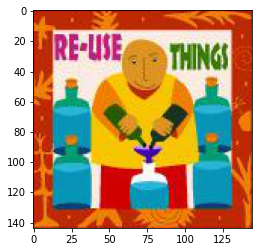

In [10]:
plt.imshow(mpimg.imread(filenames[0]))

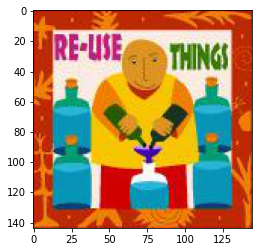

In [20]:
plt.imshow(mpimg.imread(filenames[indices[0,0]]))

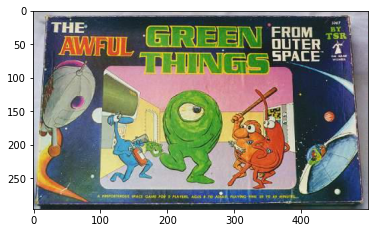

In [22]:
plt.imshow(mpimg.imread(filenames[indices[0,1]]))

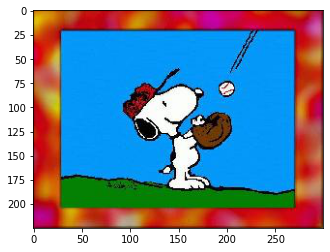

In [23]:
plt.imshow(mpimg.imread(filenames[indices[0,2]]))

In [24]:
for i in range(5):
    print(distances[0][i])

9.9960026e-08
1.117783
1.1505104
1.1700674
1.1708245
